# Case study 
## plot the bar graaph between location and number of funding

Top 5 cities by number of funding events:
         City  Total no. of funding
6   Bangalore                   848
47     Mumbai                   572
50  New Delhi                   459
24    Gurgaon                   288
57       Pune                   112


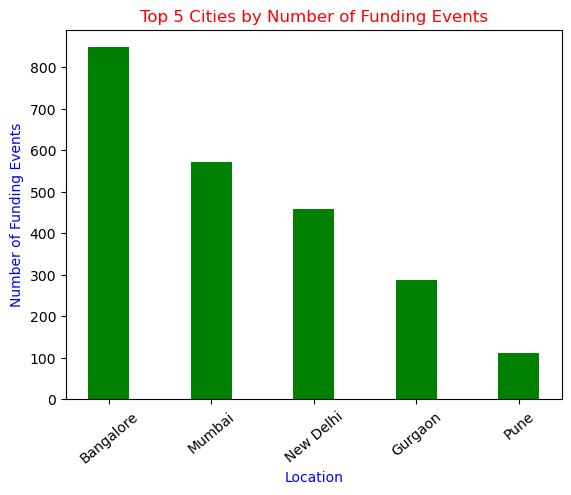

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
a = pd.read_csv(r"D:\PYTHON\python_datasets_cn\startup_funding.csv")
df = a.copy()

# Define a function to clean and standardize city names, considering only the first city if multiple are listed
def clean_city(city):
    if pd.isna(city):
        return np.nan
    city = city.split('/')[0].strip().title()  # Capitalize city names to ensure case consistency
    return city

# Apply the function to clean 'CityLocation' and create a standardized 'City' column
df['City'] = df['City  Location'].apply(clean_city)

# Further standardize city names
df['City'] = df['City'].replace({"Delhi": "New Delhi", "bangalore": "Bangalore", "Bengaluru": "Bangalore"})

# Group by city and count the number of funding events for each city
city_funding = df.groupby('City').size().reset_index(name="Total no. of funding")

# Sort by number of funding events in descending order and select the top 5
top_5_cities_by_funding_count = city_funding.sort_values(by="Total no. of funding", ascending=False).head(5)

# Display the result
print("Top 5 cities by number of funding events:")
print(top_5_cities_by_funding_count)

# Plotting the bar chart for the number of funding events in each location
plt.bar(top_5_cities_by_funding_count['City'], top_5_cities_by_funding_count['Total no. of funding'], color="green", width=0.4)
plt.xticks(rotation=40)
plt.xlabel("Location", color="blue")
plt.ylabel("Number of Funding Events", color="blue")
plt.title("Top 5 Cities by Number of Funding Events", color="red")
plt.show()


## Top 5 investor who invested maximum number of time

In [73]:
import pandas as pd
import numpy as np

# Load the data
b = pd.read_csv(r"D:\PYTHON\python_datasets_cn\startup_funding.csv")
df = b.copy()

# Drop rows where InvestorsName is missing or blank
df.dropna(subset=['Investors Name'], inplace=True)
df['Investors Name'] = df['Investors Name'].str.strip()  # Remove any extra spaces
df = df[df['Investors Name'] != '']  # Drop rows where Investors Name is blank after stripping

# Remove rows where Investors Name is 'Undisclosed Investors'
df = df[df['Investors Name'] != 'Undisclosed Investors']

# Split multiple investors into individual names and strip any extra spaces
investors_series = df['Investors Name'].str.split(',').explode().str.strip()

# Remove any entries that are blank after splitting
investors_series = investors_series[investors_series != '']

# Count each unique investor and get the top 5
investor_counts = investors_series.value_counts()
top_5_investors = investor_counts.head(5)

# Display the top 5 investors
print("Top 5 investors by number of investments:")
print(top_5_investors)


Top 5 investors by number of investments:
Investors Name
Sequoia Capital    72
Accel Partners     68
Kalaari Capital    50
Blume Ventures     47
SAIF Partners      47
Name: count, dtype: int64


### Top 5 investor who invested in different number of startups

In [85]:
import pandas as pd

# Load the data
b = pd.read_csv(r"D:\PYTHON\python_datasets_cn\startup_funding.csv")
df = b.copy()

# Drop rows where Investors Name or Startup Name is missing
df.dropna(subset=['Investors Name', 'Startup Name'], inplace=True)

# Standardize common startup names
df['Startup Name'] = df['Startup Name'].replace({
    'Ola Cabs': 'Ola',
    'Olacabs': 'Ola',
    'OYO Rooms': 'Oyo',
    'OyoRooms': 'Oyo',
    'Oyorooms': 'Oyo',
    'OYO': 'Oyo',
    'Flipkart.com': 'Flipkart',
    'Paytm Marketplace': 'Paytm'
})

# Remove rows where investors are 'Undisclosed Investors'
df = df[df['Investors Name'] != 'Undisclosed Investors']

# Split multiple investors into individual names, strip extra spaces, and explode into separate rows
df['Investors List'] = df['Investors Name'].str.split(',')
df = df.explode('Investors List')
df['Investors List'] = df['Investors List'].str.strip()

# Drop any blank investor entries after exploding
df = df[df['Investors List'] != '']

# Drop duplicate entries for each investor-startup pair to ensure unique startup counts
unique_investments = df[['Investors List', 'Startup Name']].drop_duplicates()

# Group by investor and count unique startups, then get the top 5 investors by this count
investor_startup_counts = unique_investments.groupby('Investors List').size().reset_index(name='Unique Startups')
top_5_investors_by_unique_startups = investor_startup_counts.sort_values(by='Unique Startups', ascending=False).head(5)

# Display the result
print("Top 5 investors by number of unique startups:")
print(top_5_investors_by_unique_startups)


Top 5 investors by number of unique startups:
            Investors List  Unique Startups
78          Accel Partners               59
2503       Sequoia Capital               54
1359       Kalaari Capital               47
526         Blume Ventures               43
1208  Indian Angel Network               41


### Top 5 invester who invested in different startups and their investment type is "Crowd Funding" or "Seed Funding"

In [90]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r"D:\PYTHON\python_datasets_cn\startup_funding.csv")

# Correct specific startup names
df['Startup Name'] = df['Startup Name'].replace({
    "OlaCabs": "Ola", 
    "OyoRooms": "Oyo", 
    "Oyo Rooms": "Oyo", 
    "Olacabs": "Ola",
    "Flipkart.": "Flipkart",
    "Paytm ": "Paytm"
})

# Standardize investment types by correcting misspellings
df['InvestmentType'] = df['InvestmentnType'].replace({
    "SeedFunding": "Seed Funding",
    "Crowd funding": "Crowd Funding",
    "Crowdfunding": "Crowd Funding",
    "PrivateEquity": "Private Equity",
    "DebtFunding": "Debt Funding"
})

# Filter for "Seed Funding" or "Crowd Funding" investment types
early_stage_investments = df[df['InvestmentnType'].isin(['Seed Funding', 'Crowd Funding'])]

# Remove any rows with missing values in 'Investors Name' to keep only meaningful data
early_stage_investments = early_stage_investments.dropna(subset=['Investors Name'])

# Split 'Investors Name' by commas, explode the list to get individual investors
early_stage_investments['Investors List'] = early_stage_investments['Investors Name'].str.split(',')
early_stage_investments = early_stage_investments.explode('Investors List')

# Clean up extra whitespace from investor names
early_stage_investments['Investors List'] = early_stage_investments['Investors List'].str.strip()

# Remove any blank entries from 'Investors List' column
early_stage_investments = early_stage_investments[early_stage_investments['Investors List'] != '']

# Drop duplicate investor-startup pairs to count each unique startup only once per investor
unique_investments = early_stage_investments[['Investors List', 'Startup Name']].drop_duplicates()

# Count the number of unique startups each investor has invested in
investor_startup_counts = unique_investments['Investors List'].value_counts()

# Get the top 5 investors based on the count of unique startups
top_5_investors = investor_startup_counts.head(5)

# Display the results
print("Top 5 investors who invested in a different number of startups with Seed Funding or Crowd Funding:")
print(top_5_investors)


Top 5 investors who invested in a different number of startups with Seed Funding or Crowd Funding:
Investors List
Indian Angel Network     33
Undisclosed Investors    30
Undisclosed investors    26
Rajan Anandan            24
Anupam Mittal            16
Name: count, dtype: int64


### Top 5 invester who invested in different startups and their investment type is "Private Equity"

In [93]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r"D:\PYTHON\python_datasets_cn\startup_funding.csv")

# Correct specific startup names
df['Startup Name'] = df['Startup Name'].replace({
    "OlaCabs": "Ola", 
    "OyoRooms": "Oyo", 
    "Oyo Rooms": "Oyo", 
    "Olacabs": "Ola",
    "Flipkart.": "Flipkart",
    "Paytm ": "Paytm"
})

# Standardize investment types by correcting misspellings
df['InvestmentType'] = df['InvestmentnType'].replace({
    "SeedFunding": "Seed Funding",
    "Crowd funding": "Crowd Funding",
    "Crowdfunding": "Crowd Funding",
    "PrivateEquity": "Private Equity",
    "DebtFunding": "Debt Funding"
})

# Filter for "Seed Funding" or "Crowd Funding" investment types
early_stage_investments = df[df['InvestmentnType'].isin(['Private Equity'])]

# Remove any rows with missing values in 'Investors Name' to keep only meaningful data
early_stage_investments = early_stage_investments.dropna(subset=['Investors Name'])

# Split 'Investors Name' by commas, explode the list to get individual investors
early_stage_investments['Investors List'] = early_stage_investments['Investors Name'].str.split(',')
early_stage_investments = early_stage_investments.explode('Investors List')

# Clean up extra whitespace from investor names
early_stage_investments['Investors List'] = early_stage_investments['Investors List'].str.strip()

# Remove any blank entries from 'Investors List' column
early_stage_investments = early_stage_investments[early_stage_investments['Investors List'] != '']

# Drop duplicate investor-startup pairs to count each unique startup only once per investor
unique_investments = early_stage_investments[['Investors List', 'Startup Name']].drop_duplicates()

# Count the number of unique startups each investor has invested in
investor_startup_counts = unique_investments['Investors List'].value_counts()

# Get the top 5 investors based on the count of unique startups
top_5_investors = investor_startup_counts.head(5)

# Display the results
print("Top 5 investors who invested in a different number of startups with Seed Funding or Crowd Funding:")
print(top_5_investors)


Top 5 investors who invested in a different number of startups with Seed Funding or Crowd Funding:
Investors List
Accel Partners     52
Sequoia Capital    51
Kalaari Capital    39
Blume Ventures     31
SAIF Partners      26
Name: count, dtype: int64
